In [2]:
# import pandas and load cancer data
import pandas as pd

df_red = pd.read_csv('winequality-red.csv', sep=';')
df_red.head()

df_white = pd.read_csv('winequality-white.csv', sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


First, we'll just have a look at the data

In [3]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
#how many duplicates
sum(df_red.duplicated())
sum(df_white.duplicated())

In [10]:
#how many unique quality entries
red_uniwdf_red.quality.nunique()
df_white.quality.nunique()

6

Lets combine the two datasets in to one dataframe.
Before we do this we need to add a new column to each df to indicate if the wine is red or white.
We can use NumPy for this. 

In [13]:
# import numpy 
import numpy as np

### Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value 
“red” or “white.” NumPy offers really easy way to do this using the repeat function. 

In [18]:
# create color array for red dataframe
color_red = np.repeat('red', len(df_red.index))

# create color array for white dataframe
color_white = np.repeat('white', len(df_white.index))

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [20]:
df_white['color'] = color_white
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Combine DataFrames with Append
Check the documentation for Pandas' append function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the merge method to combine the dataframes?) If you don’t get it, I’ll show you how afterwards. 

In [21]:
# append dataframes
wine_df = df_white.append(df_red)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Save Combined Dataset
Save your newly combined dataframe as winequality_edited.csv. Remember, set index=False to avoid saving with an unnamed column!

In [22]:
wine_df.to_csv("winequality_edited.csv", index=False)

### Histograms for Various Features

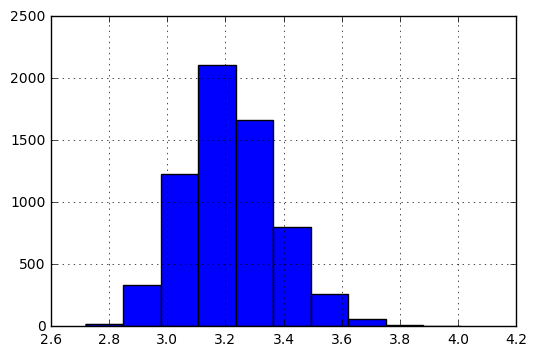

In [28]:
% matplotlib inline

wine_df['pH'].hist()

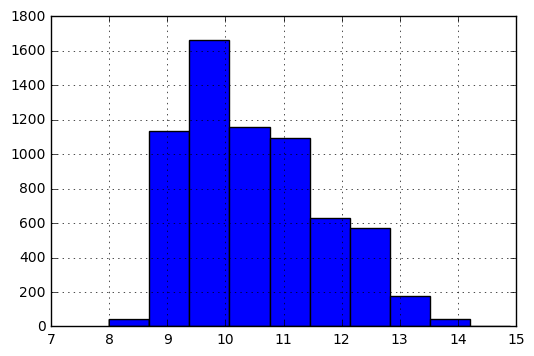

In [27]:
wine_df['alcohol'].hist()

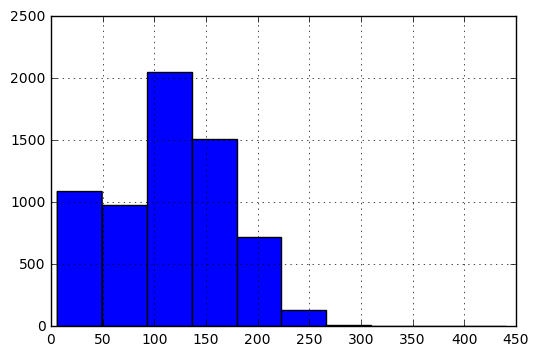

In [29]:
wine_df['total sulfur dioxide'].hist()

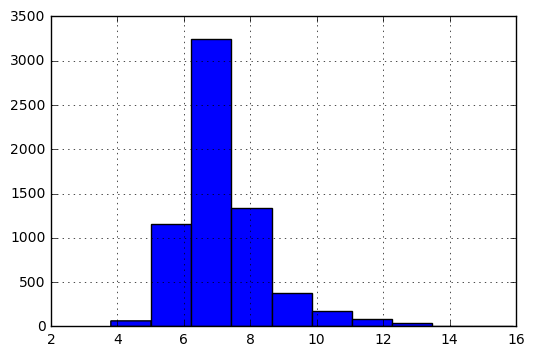

In [30]:
wine_df['fixed acidity'].hist()

### Scatterplots of Quality Against Various Features

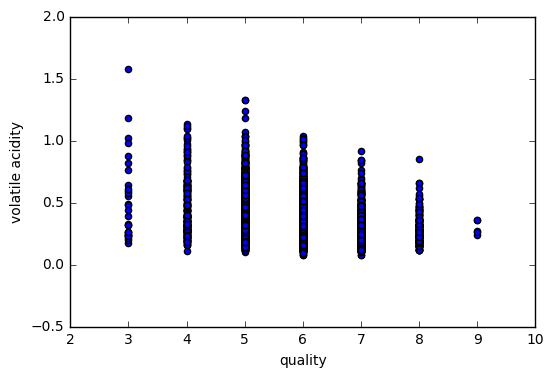

In [39]:
wine_df.plot(y='volatile acidity', x='quality', kind='scatter');

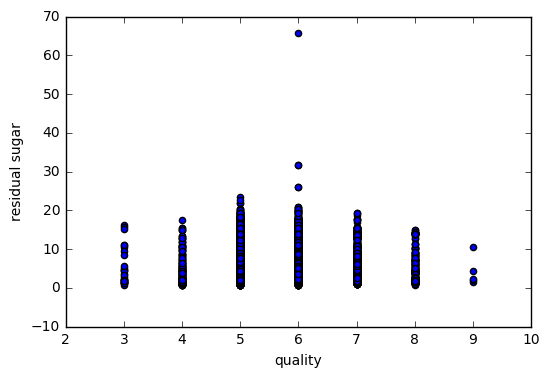

In [38]:
wine_df.plot(y='residual sugar', x='quality', kind='scatter');

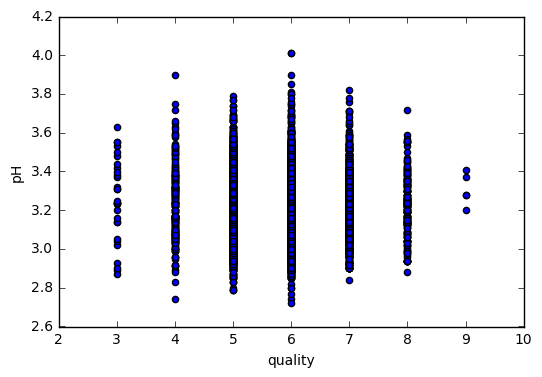

In [37]:
wine_df.plot(y='pH', x='quality', kind='scatter');

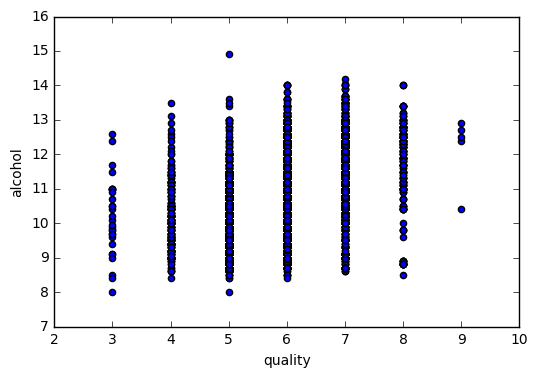

In [36]:
wine_df.plot(y='alcohol', x='quality', kind='scatter');

If we want to get the mean pH for each quality rating we can use groupby

In [40]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


We can have multiple columns to group by  by providing a list

In [41]:
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

If we're only interested in say the pH for each of these groupings'

In [42]:
wine_df.groupby(['quality', 'color'])['pH'].mean()

quality  color
3        red      3.398000
         white    3.187500
4        red      3.381509
         white    3.182883
5        red      3.304949
         white    3.168833
6        red      3.318072
         white    3.188599
7        red      3.290754
         white    3.213898
8        red      3.267222
         white    3.218686
9        white    3.308000
Name: pH, dtype: float64

### Is a certain type of wine associated with higher quality?

In [44]:
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acidity receives the highest average rating

In [51]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [52]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72 ,3.11 ,3.21 ,3.32 ,4.01 ] 

In [60]:
# Labels for the four acidity level groups
bin_names = ['v_high' ,'high' ,'med' ,'low' ] # Name each acidity level category

In [61]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,high
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,high


In [63]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels')['quality'].mean()

acidity_levels
v_high    5.783343
high      5.784540
med       5.850832
low       5.859593
Name: quality, dtype: float64

In [58]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

### pandas Query function

Heres an example of selecting rows in a dataframe by indexing with a mask, along with equivalent statements that use query().

In [ ]:
# selecting malignant records in cancer data
df_m = df[df['diagnosis'] == 'M']
df_m = df.query('diagnosis == "M"')

# selecting records of people making over $50K
df_a = df[df['income'] == ' >50K']
df_a = df.query('income == " >50K"')

### Do wines with higher alcoholic content receive better ratings?

In [64]:
# get the median amount of alcohol content
wine_df['alcohol'].median()

10.3

In [76]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol  >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [77]:
low_alcohol.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,v_high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,med
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,med
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,high


In [78]:
# get mean quality rating for the low sugar and high sugar groups
low_alcohol['quality'].mean()

5.475920679886686

In [79]:
high_alcohol['quality'].mean()

6.1460843373493974

### Lets use visualisations to see info about quality
Do this by adding .plot() to the end of the groupby() statement

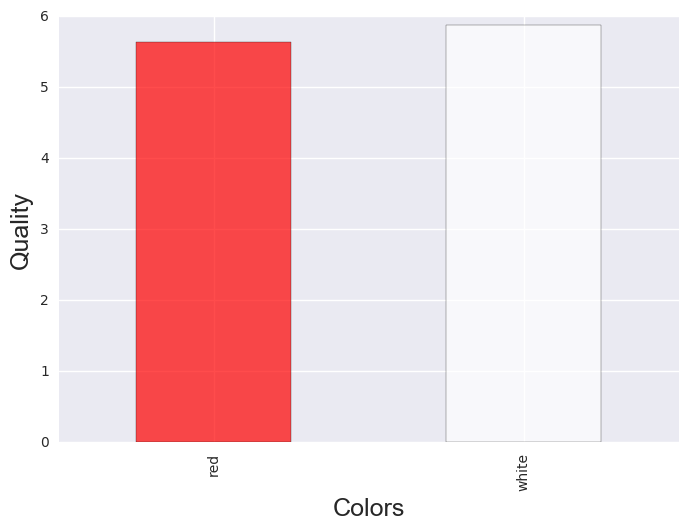

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

colors=['red', 'white']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', color= colors, alpha=.7)
plt.xlabel('Colors', fontsize=18)
plt.ylabel('Quality', fontsize=18)

Lets plot a more detailed bar chart

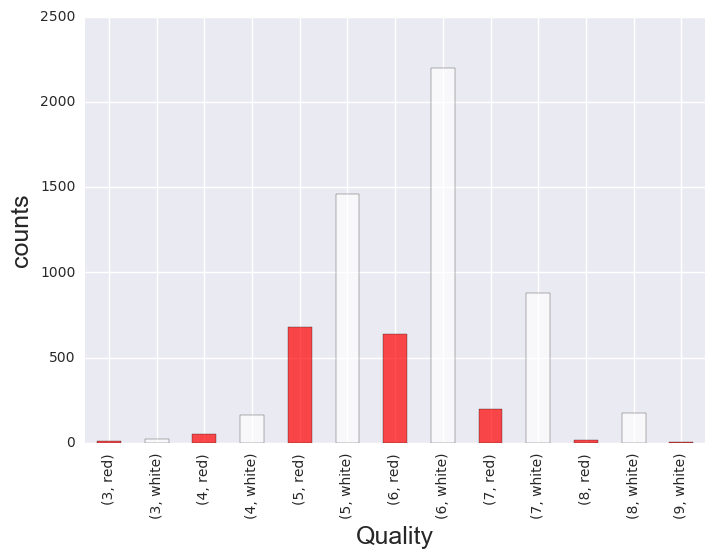

In [101]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', color= colors, alpha=.7)
plt.xlabel('Quality', fontsize=18)
plt.ylabel('counts', fontsize=18)

Thers clearly more white samples than red sapmles so its hard to make a comparison with just count. To balance this out lets divide each count by the total count for that colour to use proportions instaed

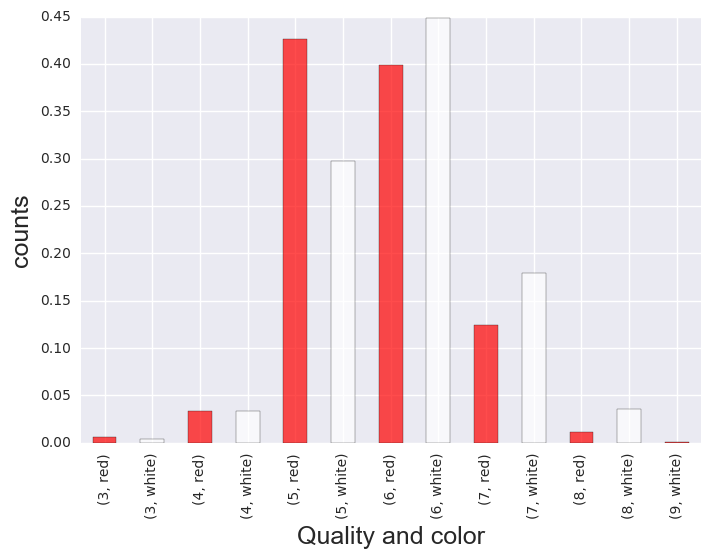

In [103]:
totals = wine_df.groupby('color').count()['pH']
proportions = counts/totals

proportions.plot(kind='bar', color= colors, alpha=.7)
plt.xlabel('Quality and color', fontsize=18)
plt.ylabel('counts', fontsize=18)

We can use matplotlob to get a lot more customisation on our charts

There are two required arguments in pyplot's bar function: the x-coordinates of the bars, and the heights of the bars.

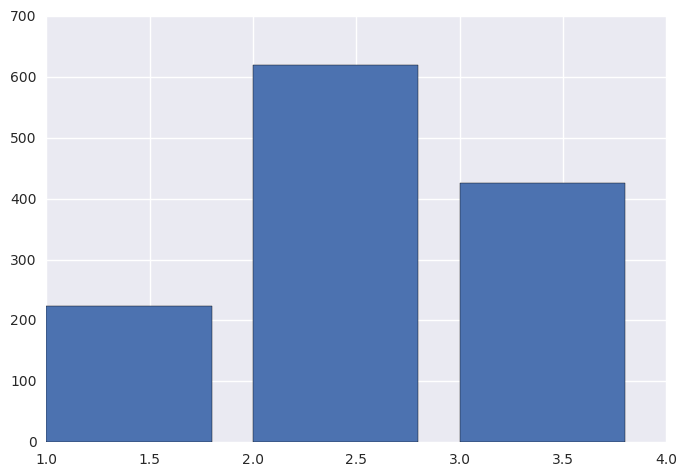

In [104]:
plt.bar([1, 2, 3], [224, 620, 425]);

You can specify the x tick labels using pyplot's xticks function, or by specifying another parameter in the bar function. The two cells below accomplish the same thing.

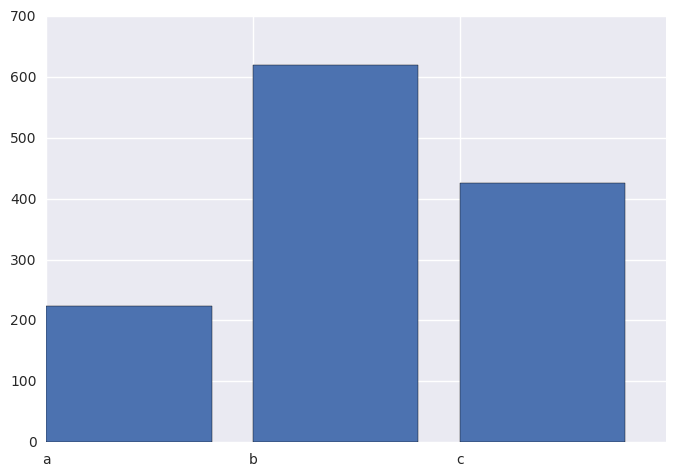

In [105]:
# plot bars
plt.bar([1, 2, 3], [224, 620, 425])

# specify x coordinates of tick labels and their labels
plt.xticks([1, 2, 3], ['a', 'b', 'c']);

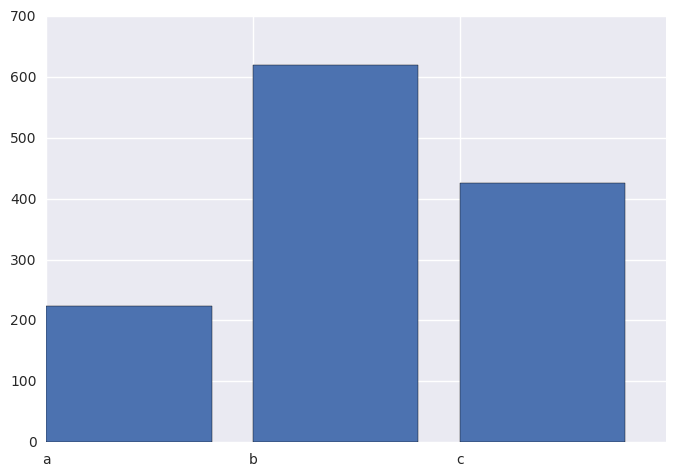

In [106]:
# plot bars with x tick labels
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c']);

Set the title and label axes like this.

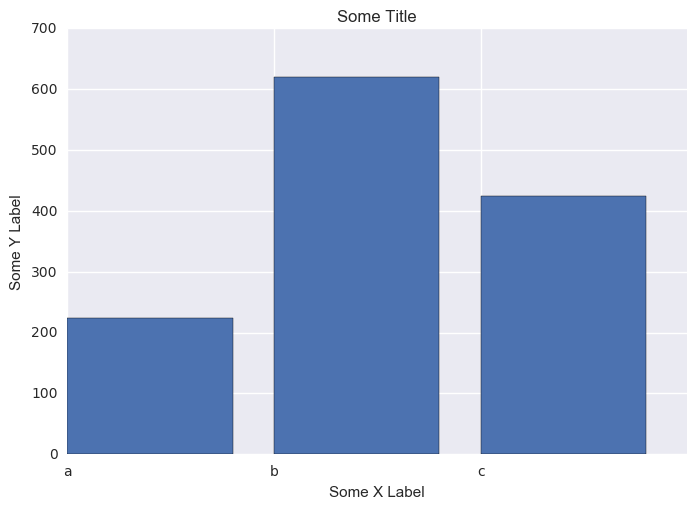

In [107]:
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c'])
plt.title('Some Title')
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label');

### #1: Do wines with higher alcoholic content receive better ratings?

In [108]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

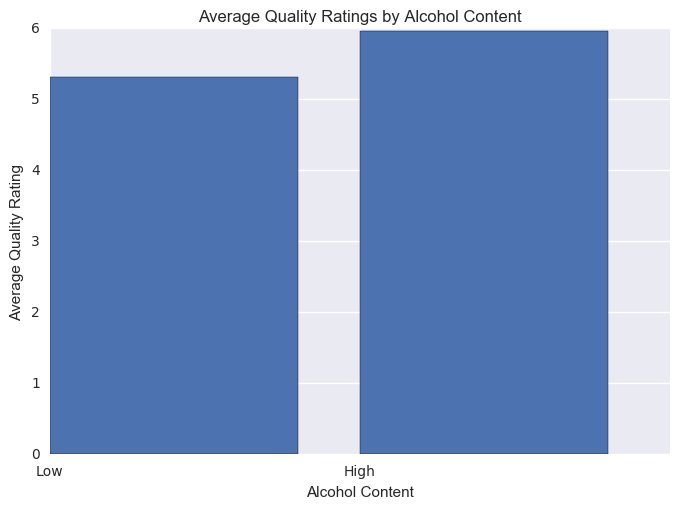

In [110]:
 #Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?

In [118]:
# Use query to select each group and get its mean quality
median_sugar = df['residual sugar'].median()
low = df.query('residual sugar < {}'.format(median_sugar))
high = df.query('residual sugar >= {}'.format(median_sugar))


SyntaxError: invalid syntax (<unknown>, line 1)

In [112]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [119]:
# Use groupby to get the mean quality for each acidity level
median_acidity = df['pH'].median()
high = df.query('pH < {}'.format(median_acidity))
low = df.query('pH >= {}'.format(median_acidity))

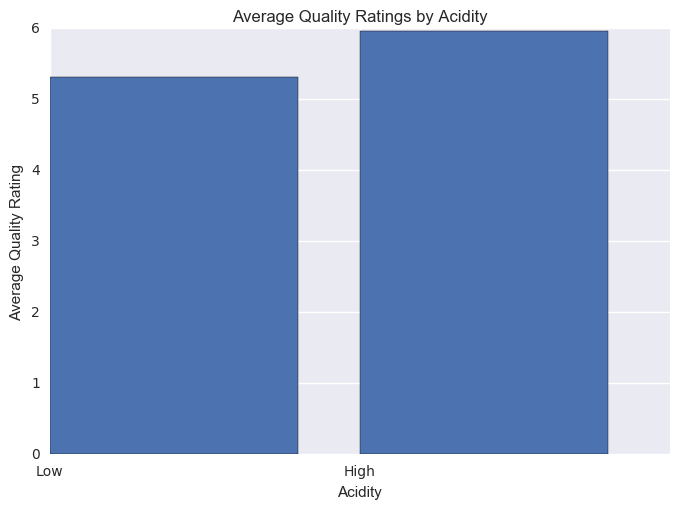

In [120]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity')
plt.xlabel('Acidity')
plt.ylabel('Average Quality Rating');

### Bonus: Create a line plot for the data in #3¶
You can use pyplot's plot function for this.
Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?

## Plotting Wine Type and Quality with Matplotlib

In [121]:
sns.set_style('darkgrid')

Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.

1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [125]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [126]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [127]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [128]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [129]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [133]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

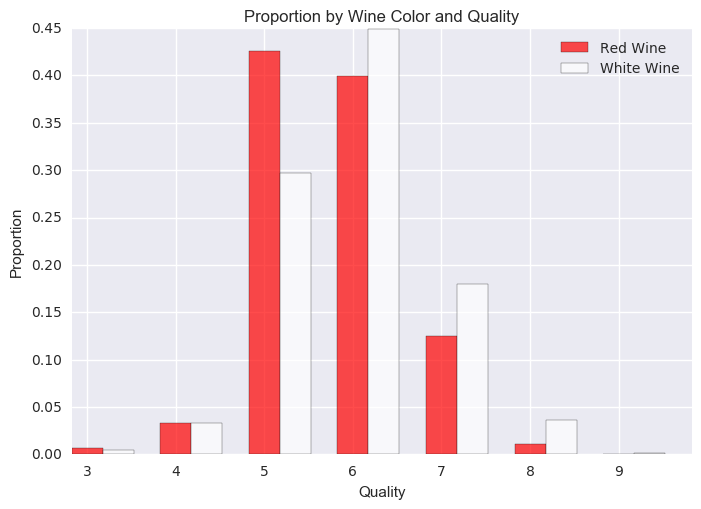

In [134]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [132]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64